In [301]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import gridspec

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits
from astropy.visualization.mpl_normalize import AsymmetricPercentileInterval
from astropy.visualization import astropy_mpl_style


import datetime

import sunpy.coordinates  # NOQA
import sunpy.map
import sunpy.data.sample
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.visualization.animator import MapSequenceAnimator
from sunpy.map import Map
from sunpy.map import compositemap
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.coordinates import Helioprojective, get_body_heliographic_stonyhurst
from sunpy.time import parse_time
from sunpy.physics.differential_rotation import differential_rotate

import aiapy.data.sample as sample_data
from aiapy.calibrate import register, update_pointing

import drms

from PIL import Image



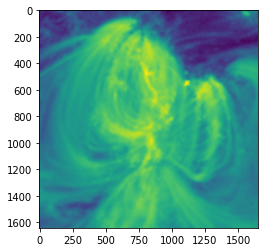

In [13]:
#plotting images from preprocessed images
imgs = []

for i in np.arange(0,9):
    with fits.open('data/aia171.fits') as hdu:
        img = hdu[0].data
        imgs.append(img)

plt.figure()
plt.imshow(imgs[0][:,:,0])#,vmin=,vmax=)
plt.show()



Flares occured 2013 June 13, 09:20-09:55

# Defining Function to download data, convert to maps and point and register

In [14]:
#function to download the data from sunpy 

def Download(A):
    '''''
    A is the wavelength 
    '''''
    # giving range of time that flare occurs
    time_range = a.Time('2013-06-13 09:20', '2013-06-13 09:55')

    # giving instrument and wavelength to get data in
    instrument = a.Instrument('AIA')
    #physobs = a.Physobs('LOS_magnetic_field') 
    wavelength = a.Wavelength(A * u.angstrom)

    # getting data in given wavelength and time range
    result = Fido.search(time_range, instrument, wavelength)
    #result = Fido.search(time_range, instrument, physobs)
    

    # downloading data
    downloaded_files = Fido.fetch(result)
    return downloaded_files

In [215]:
# Download(94)
# Download(171)
# Download(1700)

In [38]:
#function to convert fits files ot maps 

def Fits_to_maps(ang):
    '''''
    ang - wavelength as a string 

'   '''''
    # creating path to images of 171 wavelength
    path =os.listdir('AIA_June_2013_'+ ang +'/')
    #print(path_171)

    #creating empty array to append processed images to 
    maps = []

    #looping over each image and turning them into maps 
    for img in (path):
        aia_map = sunpy.map.Map('AIA_June_2013_'+ ang +'/' + img,aia_map = True)
        maps.append(aia_map)

    return maps


In [175]:
def point_register(maps):
    aia_map_calibrate = []
    for i in maps:
        aia_map_updated_pointing = update_pointing(i)
        aia_map_cal = register(aia_map_updated_pointing)
        aia_map_calibrate.append(aia_map_cal)
    return aia_map_calibrate

In [219]:
maps_1700 = Fits_to_maps('1700')
maps_1700_point_reg = point_register(maps_1700)

# maps_1700_sequence = sunpy.map.MapSequence(maps_1700_point_reg)

In [261]:
maps_171 = Fits_to_maps('171')
maps_171_point_reg = point_register(maps_171)

In [1]:
print(maps_1700_point_reg[40])
plt.figure(figsize=(15,15))
# maps_1700_point_reg[40].plot()
plt.title('AIA 1700 Å Image')
plt.get_cmap()
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
maps_171_cal[0].plot()
plt.show()

NameError: name 'maps_1700_point_reg' is not defined

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 1700.0 Angstrom
Wavelength:		 1700.0 Angstrom
Observation Date:	 2013-06-13 09:53:18
Exposure Time:		 1.000038 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [2047.5 2047.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 4,  3,  4, ..., -2, -1, -1],
       [ 2, -2,  0, ..., -1, -1, -1],
       [-1,  1,  3, ..., -2, -1, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  1],
       [ 0, -4,  0, ...,  0,  0,  0]], dtype=int16)


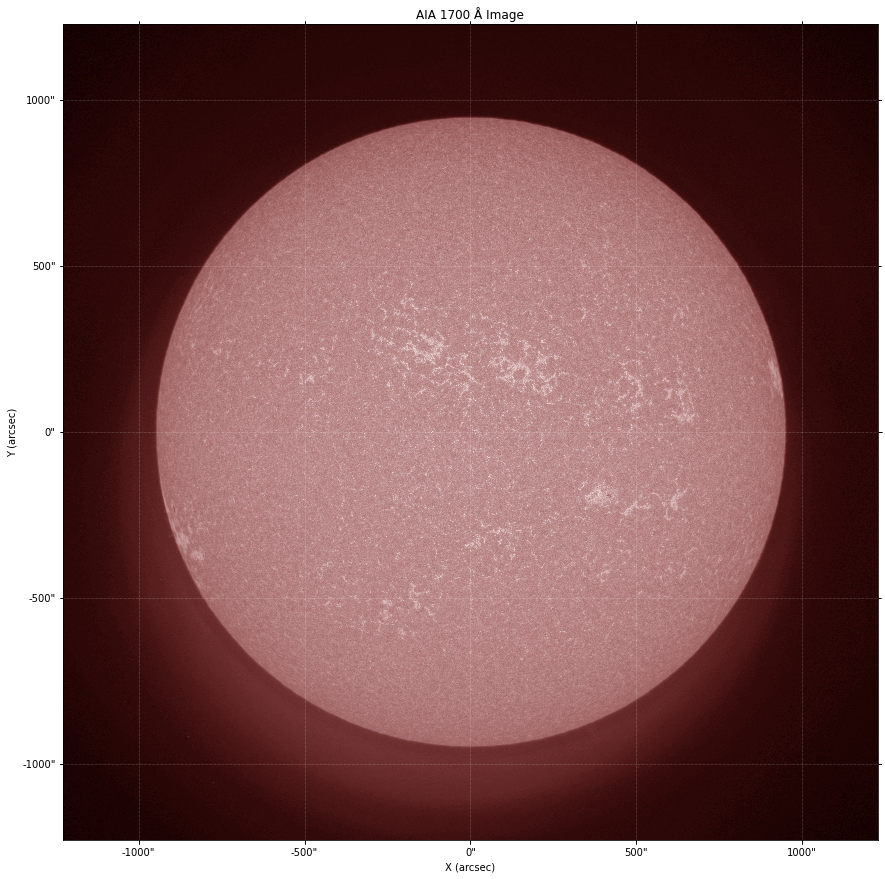

In [263]:
print(maps_1700_point_reg[0])
plt.figure(figsize=(15,15))
maps_1700_point_reg[0].plot()
plt.title('AIA 1700 Å Image')
plt.get_cmap()
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

In [287]:
# creating submaps of the 1700 waveband

#time needs to be the time of the new observation 



maps_1700_cal = []
for i in maps_1700_point_reg:
    bottom_left = SkyCoord(330 * u.arcsec, -280 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(550 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)   
    submap_pixel = i.submap(bottom_left=bottom_left, top_right=top_right)

    maps_1700_call = differential_rotate(submap_pixel,time = i.date)
    maps_1700_cal.append(maps_1700_call)




SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 1700.0 Angstrom
Wavelength:		 1700.0 Angstrom
Observation Date:	 2013-06-13 09:34:54
Exposure Time:		 1.000038 s
Dimension:		 [367. 217.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [182.81099217 107.70535233] pix
Reference Coord:	 [ 440.28592745 -214.97622101] arcsec                   
array([[ 793.94151115,  831.6318316 ,  986.98943713, ...,  655.67190306,
         585.88703335,  177.25421179],
       [ 888.20755054,  972.98892806, 1152.03837357, ...,  676.10506362,
         577.93454498,  172.94241506],
       [ 910.6840821 ,  996.9818049 , 1182.85491407, ...,  708.13198873,
         632.43649231,  191.13121972],
       ...,
       [1016.33902346, 1057.15885988,  985.76469391, ...,  595.10135983,
         677.18728283,  231.06460919],
       [ 944.71062214,  959.08020106, 1018.30514911, ...,  615.70995636,
         669.82827638,  225.26463149],
   

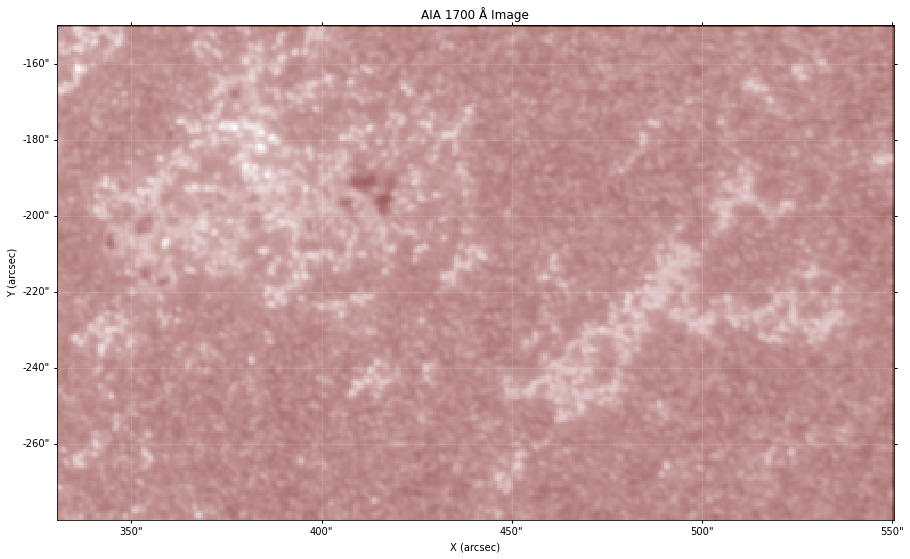

In [288]:
#maps_1700_sequence_cal = 

print(maps_1700_cal[5])
plt.figure(figsize=(15,15))
maps_1700_cal[5].plot()
plt.title('AIA 1700 Å Image')
plt.get_cmap()
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

# Creating submaps of the 171 angstrom images.

In [285]:
maps_171_cal = []
for i in maps_171_point_reg:
    bottom_left = SkyCoord(330 * u.arcsec, -280 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(550 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)    
    submap_pixel = i.submap(bottom_left=bottom_left, top_right=top_right)

    maps_171_call = differential_rotate(submap_pixel,time = i.date)
    maps_171_cal.append(maps_171_call)

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2013-06-13 09:41:47
Exposure Time:		 2.000191 s
Dimension:		 [367. 217.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [182.81783293 107.70204941] pix
Reference Coord:	 [ 440.2900319  -214.97820276] arcsec                   
array([[235.32065678, 228.89879023, 226.66738466, ..., 507.06745537,
        477.73768988, 148.25399264],
       [243.60527478, 237.1687031 , 232.67104222, ..., 485.22908498,
        464.64505708, 145.44416011],
       [271.90173634, 267.25538479, 250.6356223 , ..., 480.51712235,
        457.4755269 , 142.99951058],
       ...,
       [205.45224899, 213.42446101, 183.53371991, ..., 439.24752343,
        442.57661017, 145.16264863],
       [208.24406355, 193.3819208 , 165.3598708 , ..., 439.02014425,
        429.32586686, 137.98842224],
       [ 49.2533899 ,  44.28207642,

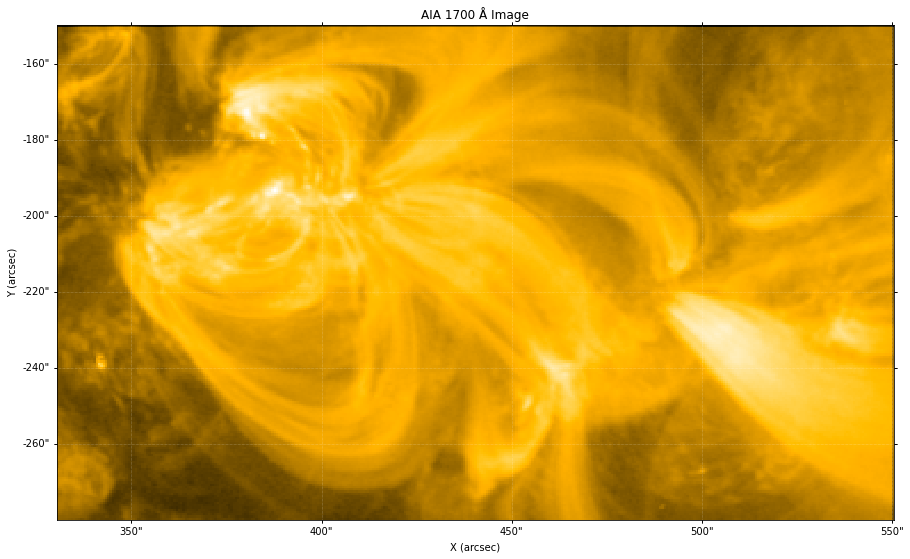

In [286]:
print(maps_171_cal[5])
plt.figure(figsize=(15,15))
maps_171_cal[5].plot(cmap = 'sdoaia171')
plt.title('AIA 1700 Å Image')
plt.get_cmap()
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

# plotting two images on the same figure 

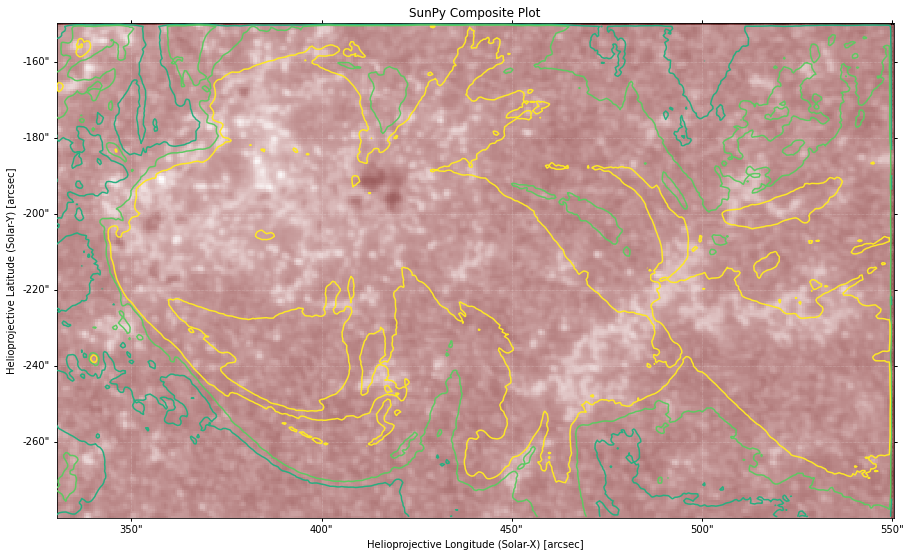

In [317]:
comp_map = sunpy.map.Map(maps_1700_cal[0], maps_171_cal[0], composite=True)

# Let's set the contours of the HMI map, the second image in our composite map
# (therefore the index is 1), from a few hundred to a thousand Gauss which
# # is the typical field associated with umbral regions of active regions.
levels = [-1000, -500, -250, 250, 500, 1000] * u.ct
comp_map.set_levels(index=1, levels=levels)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection=comp_map.get_map(0))
comp_map.plot(axes=ax)
plt.show()

In [270]:
#want to give c the coordinate the reference time of observation then in the function give the time of the new observation.

# start_time = parse_time(maps_171_cal[0].date)
# c = SkyCoord(400 *u.arcsec, -200*u.arcsec, obstime=start_time,
#         observer="earth", frame=Helioprojective)
# updated_coord = solar_rotate_coordinate(c, time = parse_time('2013-06-13 09:51:59'))


# print(updated_coord)
# print(c)


# header = sunpy.map.make_fitswcs_header(maps_171_cal[92].data, updated_coord, observatory = 'SDO', instrument = 'AIA 3', wavelength = 171*u.angstrom, exposure = 2.00018*u.s)
# map = sunpy.map.Map(maps_171_cal[92].data, header)



In [271]:

# print(map.exposure_time)
# plt.figure(figsize=(15,15))
# map.plot(cmap = 'sdoaia171')
# # plt.set_cmap('Accent')
# plt.title('AIA 171 Å Image')
# plt.xlabel('X (arcsec)')
# plt.ylabel('Y (arcsec)')
# plt.show()

In [275]:
#funtion to rotate my calibrated images

# def rotate(maps):

#     map_rotate = []

#     for i in maps:

#         start_time = parse_time(maps[0].date)
#         c = SkyCoord(400 *u.arcsec, -200*u.arcsec, obstime=start_time, observer="earth", frame=Helioprojective)
#         updated_coord = solar_rotate_coordinate(c, time = parse_time(i.date))
    
    
#         header = sunpy.map.make_fitswcs_header(i.data, updated_coord, observatory = i.observatory, instrument = i.instrument, wavelength = 171*u.angstrom, exposure = 2.00018*u.s)
#         map = sunpy.map.Map(i.data, header)
#         map_rotate.append(map)
    
#     return map_rotate

In [85]:
# importing one image in the 171 band to understand the format

map_171 = sunpy.map.Map('AIA_June_2013_171/aia_lev1_171a_2013_06_13t09_20_11_34z_image_lev1.fits')

print(maps_171_cal[0])
plt.figure(figsize=(15,15))
map_171_cal[0].plot()
plt.title('AIA 171 Å Image')
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

NotImplementedError: The ability to index Map by physical coordinate is not yet implemented.

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 94.0 Angstrom
Wavelength:		 94.0 Angstrom
Observation Date:	 2013-06-13 09:20:01
Exposure Time:		 2.902066 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600109 0.600109] arcsec / pix
Reference Pixel:	 [2057.909912 2041.52002 ] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 0,  0,  0, ...,  1,  1,  0],
       [-1,  1,  1, ..., -1,  1,  0],
       [ 1, -1,  1, ..., -1,  3, -2],
       ...,
       [ 0, -1,  1, ...,  0,  2, -2],
       [ 1,  0, -1, ...,  1, -1, -1],
       [ 1, -1, -1, ...,  0, -1, -1]], dtype=int16)


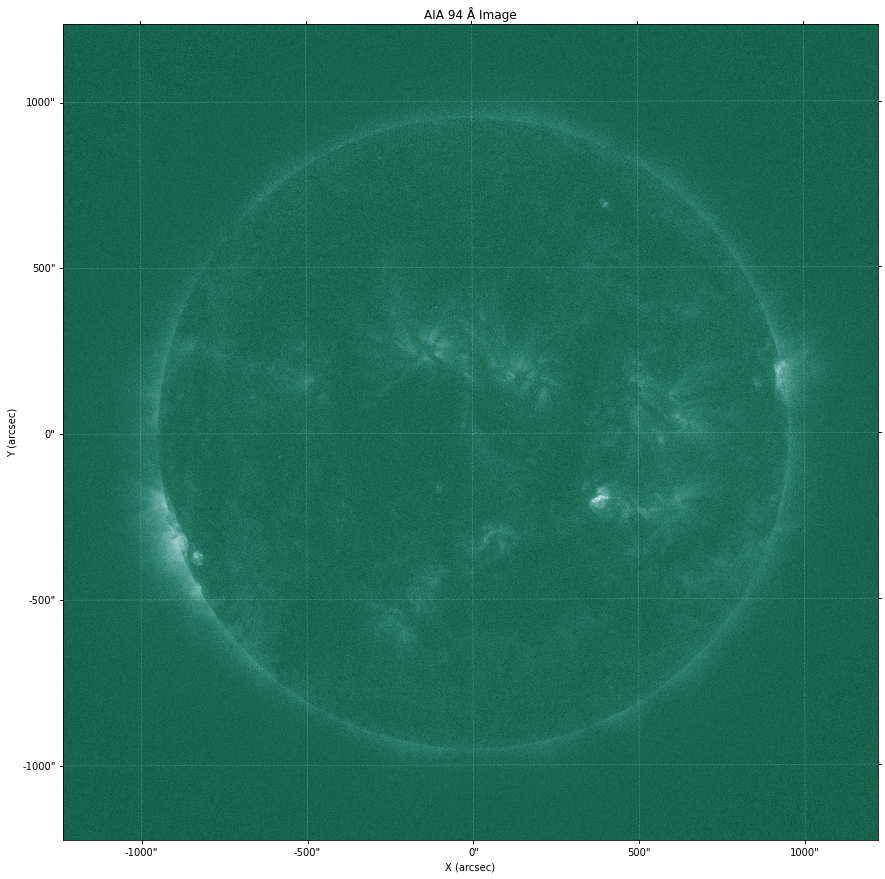

In [6]:
# importing one image in the 94 band to understand the format


map_94 = sunpy.map.Map('AIA_June_2013_94/aia_lev1_94a_2013_06_13t09_20_01_12z_image_lev1.fits')
print(map_94)

plt.figure(figsize=(15,15))
map_94.plot()
plt.title('AIA 94 Å Image')
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

In [44]:
# creating path to images of 171 wavelength
path_171 =os.listdir('AIA_June_2013_171/')
print(path_171)

#creating empty array to append processed images to 
maps_171 = []

#looping over each image, processing and appending to empty array
for img in (path_171):
    aia_map = sunpy.map.Map('AIA_June_2013_171/' + img,aia_map = True)
    maps_171.append(aia_map)

#-------------------------------------------------------------------------------

# aia_map = maps_171[50]

# aia_map_updated_pointing = update_pointing(aia_map)

# print(aia_map_updated_pointing.scale)
# print(aia_map_updated_pointing.rotation_matrix)

# aia_map_cal_50 = register(aia_map_updated_pointing)

# print(aia_map_cal_50.scale)
# print(aia_map_cal_50.rotation_matrix)

# fig = plt.figure()
# ax = fig.add_subplot(projection=aia_map_cal_50)
# aia_map_cal_50.plot(axes=ax)

# plt.show()


['aia_lev1_171a_2013_06_13t09_28_23_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_51_35_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_22_23_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_24_35_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_42_59_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_41_47_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_34_47_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_40_11_35z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_37_59_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_48_59_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_29_35_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_50_23_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_25_23_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_23_35_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_45_59_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_46_47_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_33_47_34z_image_lev1.fits', 'aia_lev1_171a_2013_06_13t09_4

In [42]:
aia_171_cal = []

for img in  maps_171:
    
    aia_map =img

    aia_map_updated_pointing = update_pointing(aia_map)

    # print(aia_map_updated_pointing.scale)
    # print(aia_map_updated_pointing.rotation_matrix)

    aia_map_cal = register(aia_map_updated_pointing)

    #print(aia_map_cal.scale)
    #print(aia_map_cal.rotation_matrix)

    # fig = plt.figure()
    # ax = fig.add_subplot(projection=aia_map_cal)
    # aia_map_cal.plot(axes=ax)

    aia_171_cal.append(aia_map_cal)

KeyboardInterrupt: 

SunPy Map
---------
Observatory:		 
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2013-06-13 09:28:23
Exposure Time:		 2.00018 s
Dimension:		 [4094. 4094.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [2046.5 2046.5] pix
Reference Coord:	 [ 400. -200.] arcsec                   
array([[ 2,  2,  0, ..., -5, -5, -5],
       [-2,  1,  2, ..., -5, -5, -5],
       [-1, -2,  0, ..., -5, -5, -5],
       ...,
       [-5, -5, -5, ..., -5, -5, -5],
       [-5, -5, -5, ..., -5, -5, -5],
       [-5, -5, -5, ..., -5, -5, -5]], dtype=int16), <sunpy.map.sources.sdo.AIAMap object at 0x7fcd09911be0>
SunPy Map
---------
Observatory:		 
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2013-06-13 09:51:35
Exposure Time:		 2.00018 s
Dimension:		 [4094. 4094.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Ref

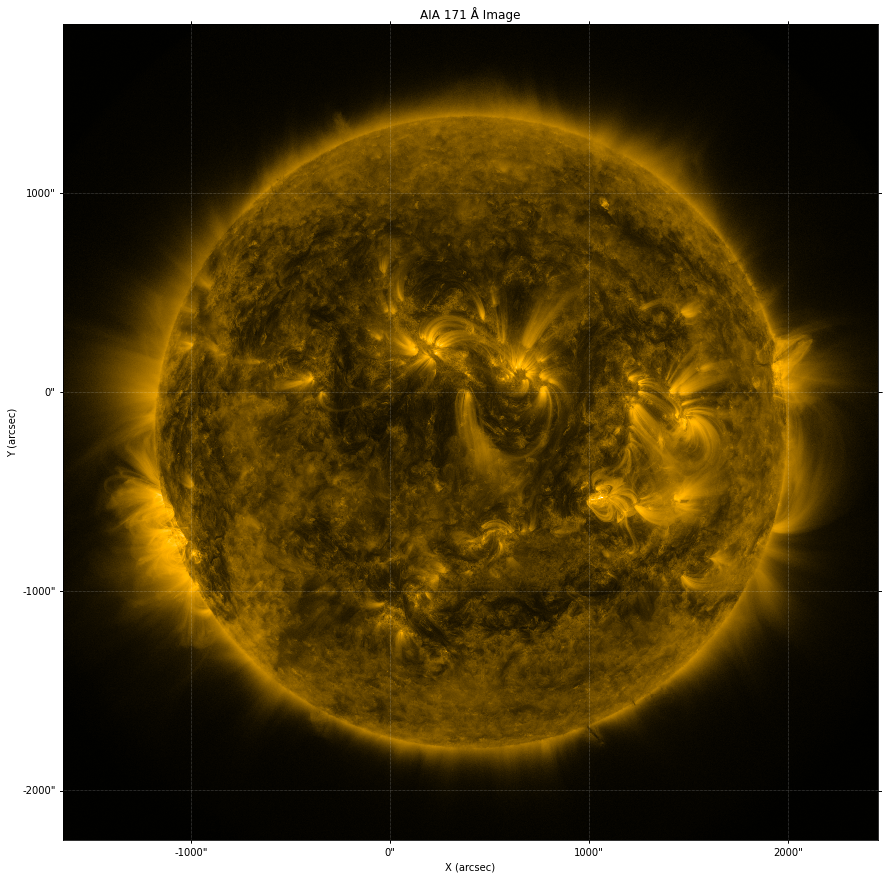

In [179]:
    #checking there is an image when i plot it 
print(maps_171_rotated)
plt.figure(figsize=(15,15))
maps_171_rotated[1].plot(cmap = 'sdoaia171')
plt.title('AIA 171 Å Image')
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

<SkyCoord (Helioprojective: obstime=2013-06-13T09:28:23.340, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2013-06-13T09:28:23.340, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00857115, 0.84225422, 1.51952938e+11)>): (Tx, Ty) in arcsec
    (330., -280.)>


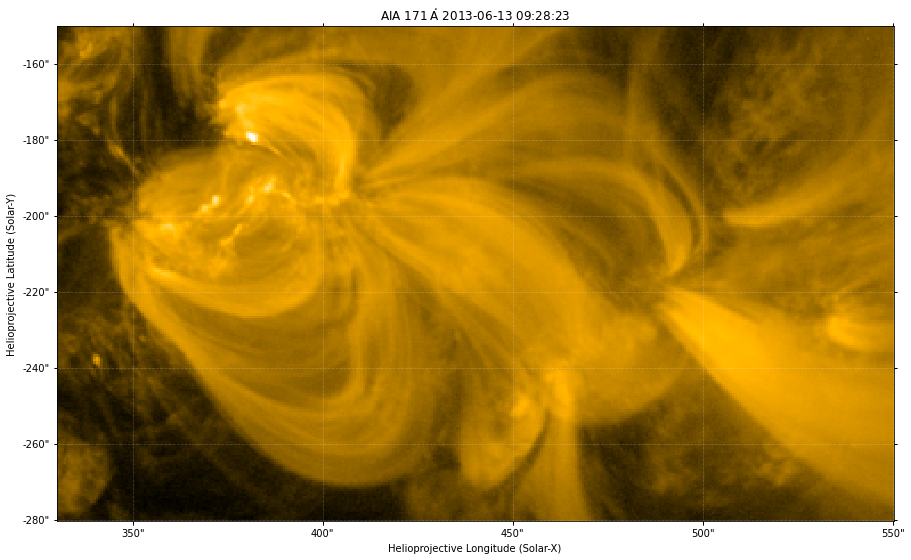

In [16]:
#Figuring out how to crop an image
#pick a bottom and top point to crop to 

# in arc seconds, frame defines a refernce coordinate system
bottom_left = SkyCoord(330 * u.arcsec, -280 * u.arcsec, frame=aia_171_cal[0].coordinate_frame)
top_right = SkyCoord(550 * u.arcsec, -150 * u.arcsec, frame=aia_171_cal[0].coordinate_frame)

#print to check it is as expected
print(bottom_left)


#crop the image
submap_pixel = aia_171_cal[0].submap(bottom_left=bottom_left, top_right=top_right)

# Plot the cropped image
plt.figure(figsize=(15,15))
submap_pixel.plot()
plt.show()

In [176]:
# crop all images to the same scale

maps_171_cropped_cal_rot = [] 

for i in maps_171_rotated:
    bottom_left = SkyCoord(250 * u.arcsec, -500 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(700 * u.arcsec, 0 * u.arcsec, frame=i.coordinate_frame)
    submap_pixel = i.submap(bottom_left=bottom_left, top_right=top_right)
    maps_171_cropped_cal_rot.append(submap_pixel)

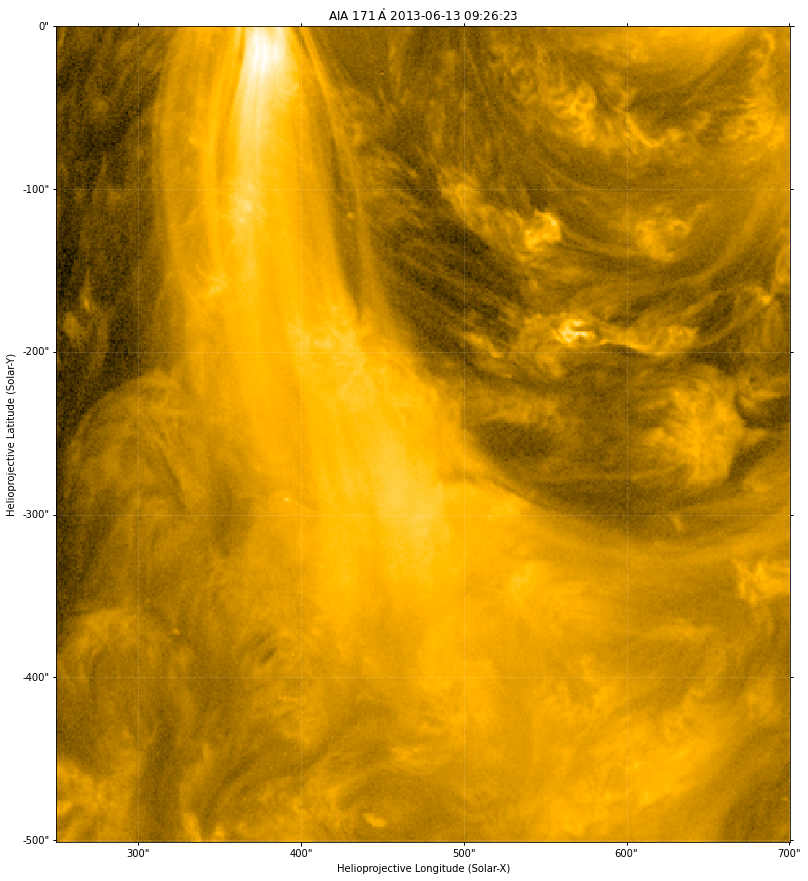

In [178]:
#checking random image works
plt.figure(figsize=(15,15))
maps_171_cropped_cal_rot[23].plot(cmap = 'sdoaia171')
plt.show()

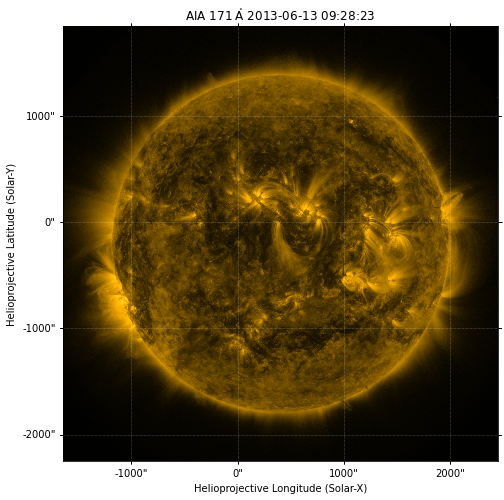

MovieWriter imagemagick unavailable; using Pillow instead.


In [181]:

#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': maps_171_rotated[0].wcs})

# plotting the first image on the axes i just created, 
im = maps_171_rotated[0].plot(cmap = 'sdoaia171',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(maps_171_rotated[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(maps_171_rotated), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

In [13]:
#it was deleting before rendering

In [14]:
#defining function to crop and create animation of downloaded data

def crop_and_animation(wavelength):
    '''''
    Wavelength defines wavelength band of images
    '''''
    path =os.listdir('AIA_June_2013_'+wavelength+'/')
    maps = []
    for img in (path):
        aia_map = sunpy.map.Map('AIA_June_2013_'+wavelength+'/' + img,aia_map = True)
        maps.append(aia_map)
    
    
    maps_cropped = [] 
    for i in maps:
        bottom_left = SkyCoord(250 * u.arcsec, -500 * u.arcsec, frame=i.coordinate_frame)
        top_right = SkyCoord(700 * u.arcsec, 0 * u.arcsec, frame=i.coordinate_frame)
        submap_pixel = i.submap(bottom_left=bottom_left, top_right=top_right)
        maps_cropped.append(submap_pixel)
        
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': maps_cropped[0].wcs})
    def update(i):
        ax.images[0].set_array(maps_cropped[i].data)  
        ax.set_title(f"Frame {i + 1}")  
    anim = FuncAnimation(fig, update, frames=len(maps_cropped), interval=200, repeat=True)
    plt.show()
        
    anim.save('solar_flare_animation_'+wavelength+'.gif', writer='imagemagick')

    return maps_cropped


# Importing photosphere data

In [209]:
pip install drms

Note: you may need to restart the kernel to use updated packages.


In [198]:
time_range = a.Time('2013-06-13 09:20', '2013-06-13 09:55') 

instrument = a.Instrument('HMI')

results = Fido.search(time_range, instrument)

files = Fido.fetch(results)

Files Downloaded:   0%|          | 0/141 [00:00<?, ?file/s]




























































































































































































Files Downloaded:   1%|          | 1/141 [00:21<49:35, 21.26s/file]













Files Downloaded:   1%|▏         | 2/141 [00:22<21:41,  9.36s/file]






















































































































































































































































Files Downloaded:   2%|▏         | 3/141 [00:30<19:55,  8.67s/file]



































































Files Downloaded:   3%|▎         | 4/141 [00:32<14:24,  6.31s/file]





































Files Downloaded:   4%|▎         | 5/141 [00:35<11:27,  5.05s/file]



















































84/0 files failed to download. Please check `.errors` for details


In [205]:
path =os.listdir('HMI_June_2013/')
HMI_maps = []
for img in (path):
    HMI_map = sunpy.map.Map('HMI_June_2013/' + img,HMI_map = True)
    HMI_maps.append(HMI_map)



SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 magnetogram
Wavelength:		 6173.0
Observation Date:	 2013-06-13 09:47:10
Exposure Time:		 Unknown
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.504306 0.504306] arcsec / pix
Reference Pixel:	 [2038.281006 2049.616211] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])


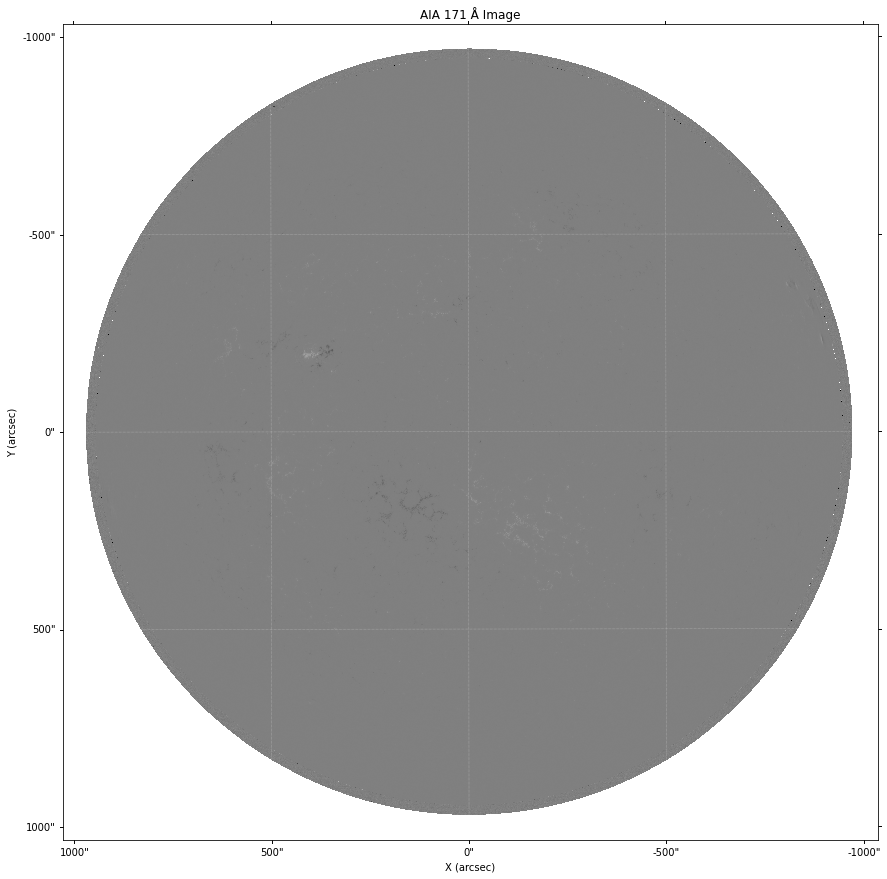

In [206]:
print(HMI_maps[8])
plt.figure(figsize=(15,15))
HMI_maps[8].plot()
plt.title('AIA 171 Å Image')
plt.get_cmap()
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.show()

In [208]:
for i in maps_171_rotated:
    for j in HMI_maps:
        if 



2013-06-13T09:28:23.340
2013-06-13T09:51:35.340
2013-06-13T09:22:23.340
2013-06-13T09:24:35.340
2013-06-13T09:42:59.340
2013-06-13T09:41:47.340
2013-06-13T09:34:47.340
2013-06-13T09:40:11.350
2013-06-13T09:37:59.340
2013-06-13T09:48:59.340
2013-06-13T09:29:35.340
2013-06-13T09:50:23.340
2013-06-13T09:25:23.340
2013-06-13T09:23:35.340
2013-06-13T09:45:59.340
2013-06-13T09:46:47.340
2013-06-13T09:33:47.340
2013-06-13T09:47:11.350
2013-06-13T09:30:59.340
2013-06-13T09:30:11.340
2013-06-13T09:39:47.340
2013-06-13T09:47:59.350
2013-06-13T09:38:11.350
2013-06-13T09:26:23.340
2013-06-13T09:20:35.340
2013-06-13T09:53:23.340
2013-06-13T09:33:11.340
2013-06-13T09:39:59.340
2013-06-13T09:30:47.340
2013-06-13T09:44:11.350
2013-06-13T09:33:59.340
2013-06-13T09:46:59.340
2013-06-13T09:45:47.340
2013-06-13T09:21:23.340
2013-06-13T09:27:35.340
2013-06-13T09:52:35.340
2013-06-13T09:54:23.340
2013-06-13T09:48:47.340
2013-06-13T09:49:11.350
2013-06-13T09:37:47.340
2013-06-13T09:43:11.350
2013-06-13T09:34

<SkyCoord (Helioprojective: obstime=2013-06-13T09:41:55.400, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2013-06-13T09:41:55.400, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.08778546, 0.843547, 1.51952043e+11)>): (Tx, Ty) in arcsec
    (330., -280.)>


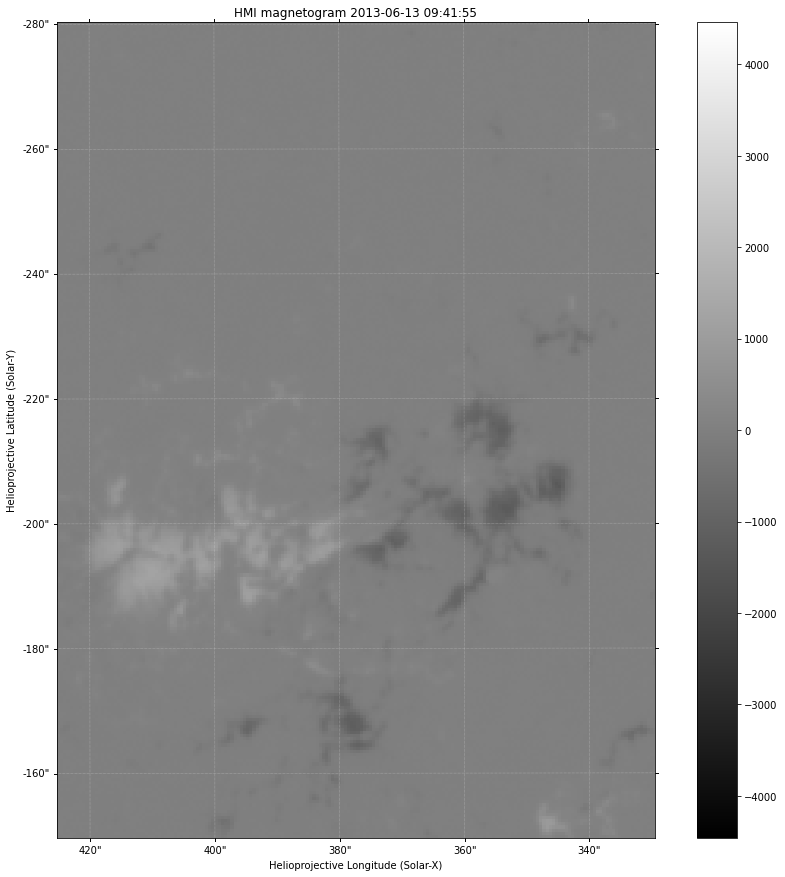

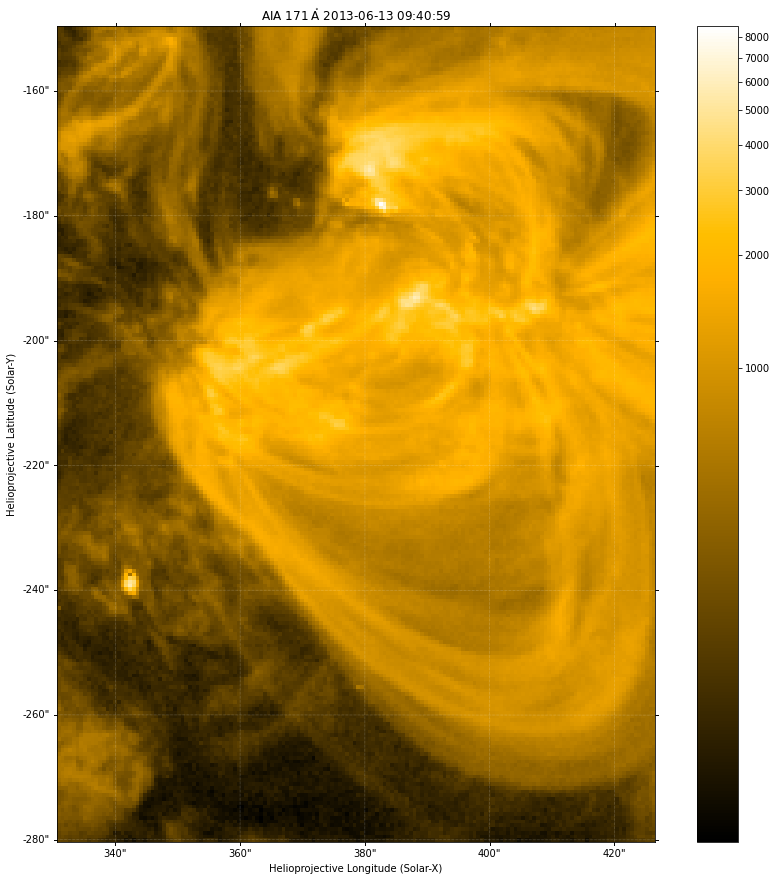

In [57]:
#Figuring out how to crop an image
#pick a bottom and top point to crop to 
# in arc seconds, frame defines a refernce coordinate system
bottom_left = SkyCoord(330 * u.arcsec, -280 * u.arcsec, frame=HMI[0].coordinate_frame)
top_right = SkyCoord(425 * u.arcsec, -150 * u.arcsec, frame=HMI[0].coordinate_frame)

#print to check it is as expected
print(bottom_left)

plt.figure(figsize=(15,15))
#crop the image
submap_pixel_HMI = HMI[0].submap(bottom_left=bottom_left, top_right=top_right)
submap_pixel_HMI.plot()
plt.colorbar()
plt.show()
# Plot the cropped image
plt.figure(figsize=(15,15))
submap_pixel = maps_171[50].submap(bottom_left=bottom_left, top_right=top_right)
submap_pixel.plot()
plt.colorbar()
plt.show()


TypeError: The axes need to be an instance of WCSAxes. To fix this pass set the `projection` keyword to this map when creating the axes.

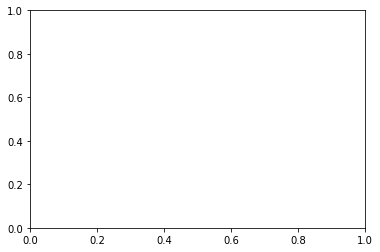

In [ ]:
# Create a figure
fig, ax = plt.subplots()

# Plot the first image with low transparency
maps_171_rotated[50].plot(axes = ax,cmap = 'sdoaia171', alpha=0.5)

# Overlay the second image with low transparency
HMI[0].plot(axes=ax, alpha=0.5)

# Display the figure
plt.show()